In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import scipy

# Excursus: Hypothesis testing
<div align="justify">

Let us first revise the basic idea of hypothesis testing, the underlying concept of conformal prediction.
Assume you have been invited to a friends home and let a food delivery bring delicious food.
Let us call the friend B.\
Both of you agree to have a coin decide which one has to pay the bill.
Yet only one coin toss would be unfair, B suggests to toss a coin 20 times.
The proportion of *heads* in the sequence would be the amount you have to pay of the bill and the proportion of *tails* is the amount your friend has to pay.
Because of modern days you do not have a coin with you and you have to take the coin of B.
Having a certain doubt B wants to only the the faith decide on the bill split you want to check whether he uses a fair coin.
With your basic knowledge in statistics you tackle this problem with hypothesis testing.
</div>

<div align="justify">


Firstly you formalize the problem. The assumption of a fair coin is your null hypothesis $H_0: \theta = \frac{1}{2}$ and the alternative hypothesis $H_1: \theta \neq \frac{1}{2}$. If B provides a fair coin the probability of having k heads in a sequence with 20 coin flips should follow the following distribution.

$$
P(H = k | H_0) = B(k, \frac{1}{2}) = \binom{20}{k}(\frac{1}{2})^k(\frac{1}{2})^{N-k} = \binom{20}{k}(\frac{1}{2})^N
$$

In the following we define the probability distribution for general sequence with N realisations.

</div>

In [10]:
def binomial_distribution(k, p, N=20):
    # denote that this function works with both k being integer and k being an array of integers
    binomial_coefficient = scipy.special.factorial(N) / (
        scipy.special.factorial(k) * scipy.special.factorial(N - k)
    )
    return binomial_coefficient *( (p) ** k )* ((1 - p) ** (N - k))

Let us visualize this distibution for our 20 coin flips.

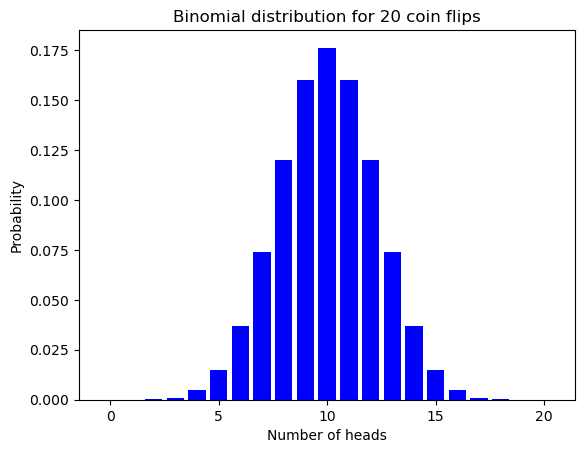

In [11]:
coin_flips = 20
head_amount = np.arange(0, coin_flips+1, 1)
probabilities = binomial_distribution(head_amount, 0.5, coin_flips)


plt.bar(x=head_amount, 
        height=probabilities,
        linewidth=.7,color="blue")
plt.title(f"Binomial distribution for {coin_flips} coin flips")
plt.xlabel("Number of heads")
plt.ylabel("Probability")
plt.show()

<div align="justify">


But because we do not want to accuse our friend without statistically certainty, we want to have a guarantee that we only at most $\epsilon$ probable falsely accuse him. Therefore we have a $1-\epsilon$ ''certainty'' that we correctly identify a biased coin. In statistics we denote this as rejecting the null hypothesis $H_0$ with a significance niveau of $\epsilon$.
Therefor we choose a thershold $r$ for the amount of heads such that

$$
    A:=P(H \leq r \lor H \geq 20-r) = \sum_{k=0}^r B(k,\frac{1}{2}) + \sum_{k=20-r}^{20} B(k,\frac{1}{2}) \leq \epsilon
$$(probabilityEquation)

In the  follwoing we show this in an animation, where the red area depicts the probability in {eq}`probabilityEquation`.

</div>

In [12]:
fig,ax = plt.subplots()
coin_flips = 20

barcollection = ax.bar(x=head_amount, 
        height=probabilities,
        linewidth=.7,
        color="green")

def animate(number_of_heads):
    probability_sum = 0
    for i in range(coin_flips):
        if i <= number_of_heads:
            # the left first bars must be color changed
            barcollection[i].set_color('r')
        if i >= coin_flips - (number_of_heads):
            barcollection[i].set_color('r')
    probability_sum = sum(probabilities[:number_of_heads+1] + probabilities[coin_flips-number_of_heads:])
    
    ax.set_title(f" A = {round(probability_sum,4)}, r = {number_of_heads},")
anim = animation.FuncAnimation(fig, animate, frames=coin_flips//2,interval=1000)
rc('animation',html='html5')
plt.close()
anim

If we would then want to have a significance of $\epsilon$ = 5\% we would have r = 5.
```{note}
Nothing can be concluded if we do not reject the null hypothesis. 
For example with $\epsilon$ = 1% and r = 5, then $A > \epsilon$ so that we can not reject the null hypothesis. 
In particular this does not imply that $H_0$ is accepted.
```